# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Import Modules


In [23]:
# The parabolic nature of the temperature scatter plot shows that there is a tendency for temperature to increase as we approach the equator from north as well as south of the equator.
# The temperature is observed to peak between 20-40 degrees latitude, based on random output.
# Humidity levels tend to be higher in cities located in and within proximity of the equator.
# Wind speeds tend to be lower in cities located in and within proximity of the equator. 
# No observable trend seen for cloudiness.


In [14]:
# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
import requests
import time
import os
import csv
import datetime
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
outputfile = "outputdata/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# Initialize list for holding latitude, longitude and cities
counter = 0
randlat = []
randlon = []
cities = []
# Create a set of random lat and lng combinations
while len(randlat) < 900:
    lat = np.random.uniform(-90, 90)
    lon = np.random.uniform(-180,180)
    city = citipy.nearest_city(lat, lon).city_name
    if city not in cities:
        randlat.append(lat)
        randlon.append(lon)
        cities.append(city)
        counter += 1

# Create a dataframe to summarize data collected.
locationdf = pd.DataFrame({"City":cities,"Latitude":randlat,"Longitude":randlon,}) 

# Inspect the first 5 rows of the data.
locationdf.head()
  

,City,Latitude,Longitude
0,chuy,-38.304613,-48.441171
1,tiksi,79.737995,124.412592
2,belushya guba,88.478752,51.076736
3,sorland,69.674758,8.424395
4,tasiilaq,59.144448,-34.563885


In [27]:
#Verify length of cities, as instructed here
len(cities)

900

In [28]:
#Check the count for each column of data.
locationdf.count()


City         900
Latitude     900
Longitude    900
dtype: int64

In [29]:
locationdf["City"].value_counts()

tisnov                  1
rio do sul              1
barawe                  1
port hedland            1
kerrville               1
nyurba                  1
filadelfia              1
kokopo                  1
potiskum                1
pandamatenga            1
okha                    1
kidal                   1
chimbarongo             1
yuksekova               1
doctor pedro p. pena    1
cap malheureux          1
bud                     1
sulangan                1
swan hill               1
sorong                  1
kampong thum            1
marrakesh               1
beidao                  1
hirara                  1
tomatlan                1
were ilu                1
kirando                 1
colac                   1
demba                   1
ewa beach               1
                       ..
lazaro cardenas         1
alofi                   1
kota kinabalu           1
copiapo                 1
avera                   1
qostanay                1
kalmunai                1
chagda      

In [30]:
# Check data types.
locationdf.dtypes


City          object
Latitude     float64
Longitude    float64
dtype: object

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [31]:
# Initalize lists to be used to collect the data from a series of API Calls.
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []
newcities = []

# Initialize counters to be used.
recordcount = 0
setcount = 0

In [32]:
# Define url.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# Print below to signal beginning of data retrieval.
print("------------------------")
print("Beginning Data Retrieval")
print("------------------------")

# Run a loop to query weather conditions in each city.
for city in cities:
    query_url = url + "&q=" + city
    
    # Collect weather data
    response = requests.get(query_url).json()
    if recordcount < 50:
        recordcount += 1
    else:
        setcount += 1
        recordcount = 0

    print(f"Processing record {recordcount} of set {setcount} | {city}")
         
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        newcities.append(city)
    except:
        print(f"{city} not found!")
        continue
        
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | chuy
Processing record 2 of set 0 | tiksi
Processing record 3 of set 0 | belushya guba
belushya guba not found!
Processing record 4 of set 0 | sorland
Processing record 5 of set 0 | tasiilaq
Processing record 6 of set 0 | lujiang
Processing record 7 of set 0 | chemal
Processing record 8 of set 0 | bonthe
Processing record 9 of set 0 | jalu
Processing record 10 of set 0 | buraydah
Processing record 11 of set 0 | mataura
Processing record 12 of set 0 | sao filipe
Processing record 13 of set 0 | lebu
Processing record 14 of set 0 | praia
Processing record 15 of set 0 | ribeira grande
Processing record 16 of set 0 | kamenskoye
kamenskoye not found!
Processing record 17 of set 0 | avarua
Processing record 18 of set 0 | punta arenas
Processing record 19 of set 0 | arraial do cabo
Processing record 20 of set 0 | new norfolk
Processing record 21 of set 0 | bambui
Processing record 22 of se

Processing record 34 of set 3 | madona
Processing record 35 of set 3 | hamilton
Processing record 36 of set 3 | narasannapeta
Processing record 37 of set 3 | necochea
Processing record 38 of set 3 | liberal
Processing record 39 of set 3 | chilliwack
Processing record 40 of set 3 | tautira
Processing record 41 of set 3 | rocha
Processing record 42 of set 3 | mar del plata
Processing record 43 of set 3 | soyo
Processing record 44 of set 3 | forbes
Processing record 45 of set 3 | bridgeton
Processing record 46 of set 3 | le port
Processing record 47 of set 3 | kanor
Processing record 48 of set 3 | tayzhina
Processing record 49 of set 3 | todos santos
Processing record 50 of set 3 | komsomolskiy
Processing record 0 of set 4 | chapais
Processing record 1 of set 4 | provideniya
Processing record 2 of set 4 | dunedin
Processing record 3 of set 4 | clyde river
Processing record 4 of set 4 | pauini
Processing record 5 of set 4 | sisophon
Processing record 6 of set 4 | awbari
Processing record 7

Processing record 23 of set 7 | nha trang
Processing record 24 of set 7 | norwich
Processing record 25 of set 7 | senanga
Processing record 26 of set 7 | sorong
Processing record 27 of set 7 | the pas
Processing record 28 of set 7 | dongsheng
Processing record 29 of set 7 | los llanos de aridane
Processing record 30 of set 7 | faya
Processing record 31 of set 7 | marawi
Processing record 32 of set 7 | bima
Processing record 33 of set 7 | zaysan
Processing record 34 of set 7 | terney
Processing record 35 of set 7 | salta
Processing record 36 of set 7 | guerrero negro
Processing record 37 of set 7 | megion
Processing record 38 of set 7 | torbay
Processing record 39 of set 7 | mongu
Processing record 40 of set 7 | lastoursville
Processing record 41 of set 7 | zhezkazgan
Processing record 42 of set 7 | korla
korla not found!
Processing record 43 of set 7 | saint-pierre
Processing record 44 of set 7 | hervey bay
Processing record 45 of set 7 | tumannyy
tumannyy not found!
Processing record 

Processing record 11 of set 11 | koumac
Processing record 12 of set 11 | idrinskoye
Processing record 13 of set 11 | sao joao de pirabas
Processing record 14 of set 11 | simpang
Processing record 15 of set 11 | whitehorse
Processing record 16 of set 11 | gueret
Processing record 17 of set 11 | kloulklubed
Processing record 18 of set 11 | ringe
Processing record 19 of set 11 | oranjemund
Processing record 20 of set 11 | bandar
Processing record 21 of set 11 | kamloops
Processing record 22 of set 11 | zhigansk
Processing record 23 of set 11 | sawakin
Processing record 24 of set 11 | sibulan
Processing record 25 of set 11 | grand centre
grand centre not found!
Processing record 26 of set 11 | krasnyy chikoy
Processing record 27 of set 11 | ende
Processing record 28 of set 11 | la sarre
Processing record 29 of set 11 | nadvoitsy
Processing record 30 of set 11 | media luna
Processing record 31 of set 11 | roros
Processing record 32 of set 11 | krivopolyanye
krivopolyanye not found!
Processi

Processing record 48 of set 14 | zdvinsk
Processing record 49 of set 14 | slawno
Processing record 50 of set 14 | bhimunipatnam
Processing record 0 of set 15 | shiyan
Processing record 1 of set 15 | mokolo
Processing record 2 of set 15 | awjilah
Processing record 3 of set 15 | ileza
Processing record 4 of set 15 | sarakhs
Processing record 5 of set 15 | beidao
Processing record 6 of set 15 | tiznit
Processing record 7 of set 15 | jinchengjiang
jinchengjiang not found!
Processing record 8 of set 15 | esna
Processing record 9 of set 15 | lahij
Processing record 10 of set 15 | yerbogachen
Processing record 11 of set 15 | alice springs
Processing record 12 of set 15 | rawannawi
rawannawi not found!
Processing record 13 of set 15 | fenyi
Processing record 14 of set 15 | tungor
Processing record 15 of set 15 | pinawa
Processing record 16 of set 15 | dandong
Processing record 17 of set 15 | afgoye
afgoye not found!
Processing record 18 of set 15 | northam
Processing record 19 of set 15 | poch

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
# Create a dataframe with all data gathered from the series of API calls.
cityweatherdf = pd.DataFrame({"City" : newcities,
                              "Cloudiness (%)" : cloudiness,
                              "Country" : country,
                              "Date" : date,
                              "Humidity (%)" : humidity,
                              "Latitude" : lat,
                              "Longitude" : lng,
                              "Max Temp (F)" : temp,
                              "Wind Speed (mph)": wind})

# Display first 5 rows of the dataframe
cityweatherdf.head()

,City,Cloudiness (%),Country,Date,Humidity (%),Latitude,Longitude,Max Temp (F),Wind Speed (mph)
0,chuy,100,UY,1562789326,82,-33.69,-53.46,55.6,2.84
1,tiksi,51,RU,1562789327,74,71.64,128.87,53.8,9.69
2,sorland,75,NO,1562789327,87,67.67,12.69,51.8,9.17
3,tasiilaq,20,GL,1562789328,70,65.61,-37.64,48.2,9.17
4,lujiang,0,CN,1562789328,83,31.26,117.28,71.6,4.47


In [34]:
cityweatherdf.describe()

,Cloudiness (%),Date,Humidity (%),Latitude,Longitude,Max Temp (F),Wind Speed (mph)
count,826.000000,8.260000e+02,826.000000,826.000000,826.00000,826.000000,826.000000
mean,47.157385,1.562789e+09,68.369249,20.434855,15.35954,70.233354,7.387809
std,40.178353,1.122802e+02,22.576748,32.216849,88.57857,14.190035,5.323250
min,0.000000,1.562789e+09,6.000000,-54.810000,-179.17000,31.470000,0.290000
25%,1.000000,1.562789e+09,52.000000,-3.935000,-66.97500,59.005000,3.360000
50%,40.000000,1.562789e+09,73.000000,25.825000,18.32000,71.600000,6.005000
75%,90.000000,1.562790e+09,87.000000,47.530000,91.99750,80.615000,9.772500
max,100.000000,1.562790e+09,100.000000,78.220000,179.32000,109.400000,33.330000


In [35]:
#Perform a count
cityweatherdf.count()

City                826
Cloudiness (%)      826
Country             826
Date                826
Humidity (%)        826
Latitude            826
Longitude           826
Max Temp (F)        826
Wind Speed (mph)    826
dtype: int64

In [36]:
cityweatherdf["City"].value_counts()

tisnov                 1
kokopo                 1
patitirion             1
ewa beach              1
demba                  1
colac                  1
moose factory          1
port hedland           1
barda                  1
kerrville              1
nyurba                 1
filadelfia             1
potiskum               1
bafilo                 1
okha                   1
kidal                  1
yabelo                 1
yuksekova              1
mangan                 1
cap malheureux         1
bud                    1
sulangan               1
swan hill              1
kampong thum           1
rikitea                1
mount isa              1
beidao                 1
bethel                 1
rio do sul             1
redmond                1
                      ..
owando                 1
victor harbor          1
nakhon si thammarat    1
pevek                  1
griffith               1
jining                 1
karratha               1
taoudenni              1
media luna             1


In [37]:
# Drop null values, if any
cleancityweatherdf = cityweatherdf.dropna(how = "any").drop_duplicates(subset=["City", "Wind Speed (mph)"], keep=False)

# Drop duplicate values


# Display clean dataframe
cleancityweatherdf

,City,Cloudiness (%),Country,Date,Humidity (%),Latitude,Longitude,Max Temp (F),Wind Speed (mph)
0,chuy,100,UY,1562789326,82,-33.69,-53.46,55.60,2.84
1,tiksi,51,RU,1562789327,74,71.64,128.87,53.80,9.69
2,sorland,75,NO,1562789327,87,67.67,12.69,51.80,9.17
3,tasiilaq,20,GL,1562789328,70,65.61,-37.64,48.20,9.17
4,lujiang,0,CN,1562789328,83,31.26,117.28,71.60,4.47
5,chemal,100,RU,1562789328,96,51.41,86.00,49.65,0.72
6,bonthe,100,SL,1562789204,87,7.53,-12.50,77.20,9.98
7,jalu,0,LY,1562789329,31,29.03,21.55,88.00,13.09
8,buraydah,0,SA,1562789329,20,26.33,43.97,93.20,5.82
9,mataura,90,NZ,1562789330,95,-46.19,168.86,44.01,1.01


In [38]:
# Create a CSV file and save the output of the weather results
outputfile = ("cities.csv")
with open(outputfile, 'w') as datafile:
    cleancityweatherdf.to_csv(outputfile)



### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [39]:
# Format date to show current date on the plot
date = datetime.datetime.fromtimestamp(int(cityweatherdf["Date"][0])).strftime('%m/%d/%Y')

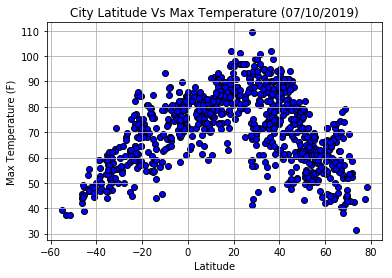

In [40]:
# Create and save Latitude vs. Temperature Plot
plt.scatter(x = cleancityweatherdf["Latitude"], y = cleancityweatherdf["Max Temp (F)"], c = "blue", edgecolor = "black")
plt.title("City Latitude Vs Max Temperature ({})".format(date) )
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Latitude_vs_Temperature.png")

#### Latitude vs. Humidity Plot

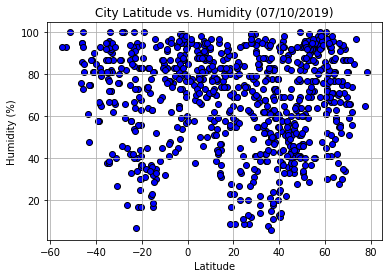

In [41]:
# Creat and save Latitude vs. Humidity Plot
plt.scatter(x = cleancityweatherdf["Latitude"], y = cleancityweatherdf["Humidity (%)"], c = "blue", edgecolor = "black")
plt.title("City Latitude vs. Humidity ({})".format(date) )
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Latitude_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

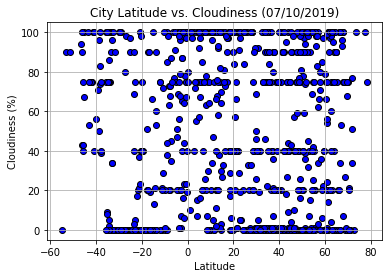

In [42]:
# Create and save Latitude vs. Cloudiness Plot
plt.scatter(x = cleancityweatherdf["Latitude"], y = cleancityweatherdf["Cloudiness (%)"], c = "blue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness ({})".format(date) )
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Latitude_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

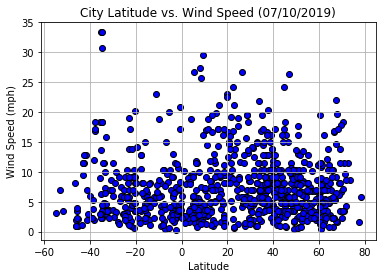

In [43]:
# Create and save Latitude vs. Wind Speed Plot
plt.scatter(x = cleancityweatherdf["Latitude"], y = cleancityweatherdf["Wind Speed (mph)"], c = "blue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed ({})".format(date) )
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Latitude_vs_Wind_Speed.png")